In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import datetime
import calendar
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [2]:
# Reads file  
df = pd.read_csv("../data/Constraint_English_Train.csv", encoding ="utf-8") 

In [3]:
df.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6420 non-null   int64 
 1   tweet   6420 non-null   object
 2   label   6420 non-null   object
dtypes: int64(1), object(2)
memory usage: 150.6+ KB


In [5]:
grouped = df.groupby(df.label) 
fake = grouped.get_group("fake") 
fake

,id,tweet,label
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
7,8,Obama Calls Trump’s Coronavirus Response A Cha...,fake
8,9,"???Clearly, the Obama administration did not l...",fake
9,10,Retraction—Hydroxychloroquine or chloroquine w...,fake
11,12,The NBA is poised to restart this month. In Ma...,fake
...,...,...,...
6413,6414,States like New York Illinois and California h...,fake
6415,6416,A tiger tested positive for COVID-19 please st...,fake
6416,6417,???Autopsies prove that COVID-19 is??� a blood...,fake
6417,6418,_A post claims a COVID-19 vaccine has already ...,fake


In [6]:
def get_content_of_df(df):
    
    comment_words = ''
    #stopwords = set(STOPWORDS) 
  
    # iterate through the csv file 
    df = pd.DataFrame(df)
    for val in df.tweet: 
      
        # typecaste each val to string 
        val = str(val) 
  
        # split the value 
        tokens = val.split() 
      
        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
        comment_words += " ".join(tokens)+" "  
        
    return comment_words

In [7]:
trial = get_content_of_df(fake)
print (trial)

politically correct woman (almost) uses pandemic as excuse not to reuse plastic bag https://t.co/thf8gunfpe #coronavirus #nashville obama calls trump’s coronavirus response a chaotic disaster https://t.co/dedqzehasb ???clearly, the obama administration did not leave any kind of game plan for something like this.??� retraction—hydroxychloroquine or chloroquine with or without a macrolide for treatment of covid-19: a multinational registry analysis - the lancet https://t.co/l5v2x6g9or the nba is poised to restart this month. in march we reported on how the utah jazz got 58 coronavirus tests in a matter of hours at a time when u.s. testing was sluggish. https://t.co/i8yjjrnoth https://t.co/o0nk6gpyos because of donald trump's negligence and incompetence: - more than 110,000 people have died - we have nearly 2 million cases of covid-19 - over 20 million americans are out of work and yet he’s patting himself on the back. unbelievable. multiple facebook posts claim that “aussies will be fine

In [8]:
def build_wg(text):
    wordcloud = WordCloud(width = 800, height = 800, 
                          background_color ='white',
                          min_font_size = 10).generate(text) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
  
    plt.show() 

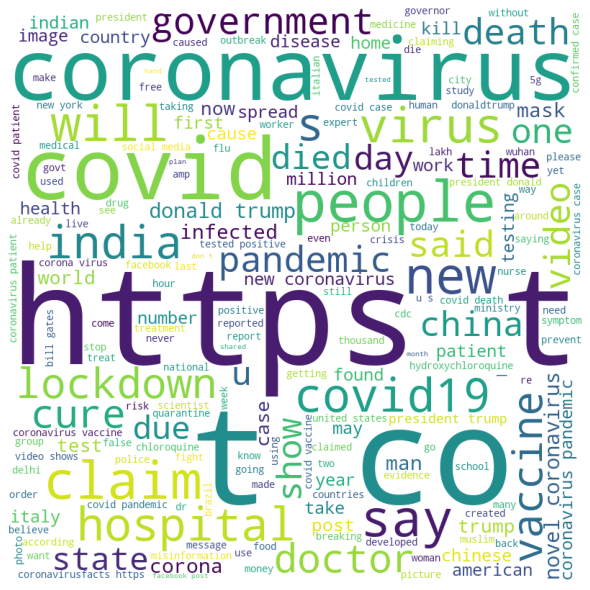

In [9]:
build_wg(trial)

In [10]:
grouped = df.groupby(df.label) 
real = grouped.get_group("real") 
real

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real
5,6,"Covid Act Now found ""on average each person in...",real
...,...,...,...
6404,6405,“Sometimes it’s not a lack of resources that m...,real
6405,6406,The cloth face coverings recommended to slow s...,real
6411,6412,The latest updates from the Ministry of Health...,real
6414,6415,Data from #COVIDNET show that after a period o...,real


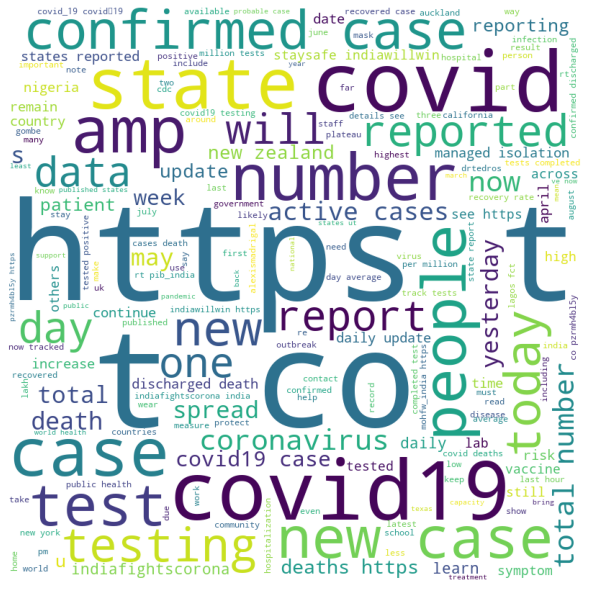

In [11]:
real = get_content_of_df(real)
build_wg(real)